# import libraries

In [17]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from helpers import parse_variables, get_risk_level, map_to_color

In [18]:
files_to_analyze = [f for f in os.listdir(f"data/results") if f.startswith('G')]

In [19]:
file_to_analyze = files_to_analyze[0]
total_elapsed_time = file_to_analyze.split('_total_')[1].split('seconds')[0]
performances = pd.read_pickle(f"data/results/{file_to_analyze}")

In [20]:
performances

,risk_no_risk_noise_0.1_ratioeffect_0,risk_NW_risk_noise_0.1_ratioeffect_0,risk_N_risk_noise_0.1_ratioeffect_0,risk_blob_risk_noise_0.1_ratioeffect_0,risk_center_risk_noise_0.1_ratioeffect_0,risk_big_square_risk_noise_0.1_ratioeffect_0,risk_square_risk_noise_0.1_ratioeffect_0,risk_hi_square_risk_noise_0.1_ratioeffect_0,risk_hi_gauss_blob_risk_noise_0.1_ratioeffect_0,risk_two_square_risk_noise_0.1_ratioeffect_0,...,risk_hi_square_risk_noise_0.9_ratioeffect_0.5,risk_hi_gauss_blob_risk_noise_0.9_ratioeffect_0.5,risk_two_square_risk_noise_0.9_ratioeffect_0.5,risk_gauss_blob_risk_noise_0.9_ratioeffect_0.5,risk_three_square_risk_noise_0.9_ratioeffect_0.5,risk_mid_mid_square_risk_noise_0.9_ratioeffect_0.5,risk_no_risk_noise_0.1_ratioeffect_1,risk_no_risk_noise_0.5_ratioeffect_1,risk_no_risk_noise_0.9_ratioeffect_1,tools
0,3.024340e-16,2.638671,3.674077,1.875636,2.198451,2.499010,2.805510,3.135968,5.118835,2.657038,...,0.424818,0.732541,0.201259,0.251283,0.268310,0.011009,4.229398e-16,4.229398e-16,4.229398e-16,-logP_no_corr
1,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-logP_best_corr
2,5.265604e-03,0.003345,0.007405,1.564207,2.145866,2.198689,2.503234,2.836452,3.056821,2.716180,...,0.269978,0.137477,0.166540,0.044792,0.190687,0.013682,1.534672e-02,1.534672e-02,1.534672e-02,-logP_true_pop
3,5.176214e-02,0.127190,0.191270,0.210653,0.165824,0.211398,0.266969,0.374423,0.378741,0.313779,...,0.090851,0.108458,0.052438,0.022661,0.042277,0.027280,5.652150e-02,5.652150e-02,5.652150e-02,-logP_abyss_via_true_pops
4,4.908016e-02,0.086754,0.114600,0.036763,0.088747,0.077167,0.081461,0.075026,0.166015,0.095646,...,0.044972,0.047999,0.024504,0.007199,0.011507,0.026466,4.949456e-02,4.949456e-02,4.949456e-02,-logP_abyss_pq2pq_via_esti_pops
5,4.901794e-02,0.076850,0.108348,0.018556,0.089421,0.061255,0.066873,0.055941,0.210132,0.084383,...,0.046242,0.053718,0.029638,0.011609,0.016836,0.026569,5.170983e-02,5.170983e-02,5.170983e-02,-logP_combined
6,4.063072e-02,0.095265,0.149185,0.013755,0.092919,0.118731,0.169767,0.284253,0.506530,0.307634,...,0.045131,0.048534,0.033746,0.007760,0.017913,0.022978,5.311991e-02,5.311991e-02,5.311991e-02,-logP_PCs
7,5.158000e-02,0.007430,0.013987,0.038148,0.009342,0.035404,0.016654,0.018249,0.003599,0.020371,...,0.141175,0.158681,0.123229,0.093984,0.105422,0.118366,2.284379e-01,2.284379e-01,2.284379e-01,expected_logP


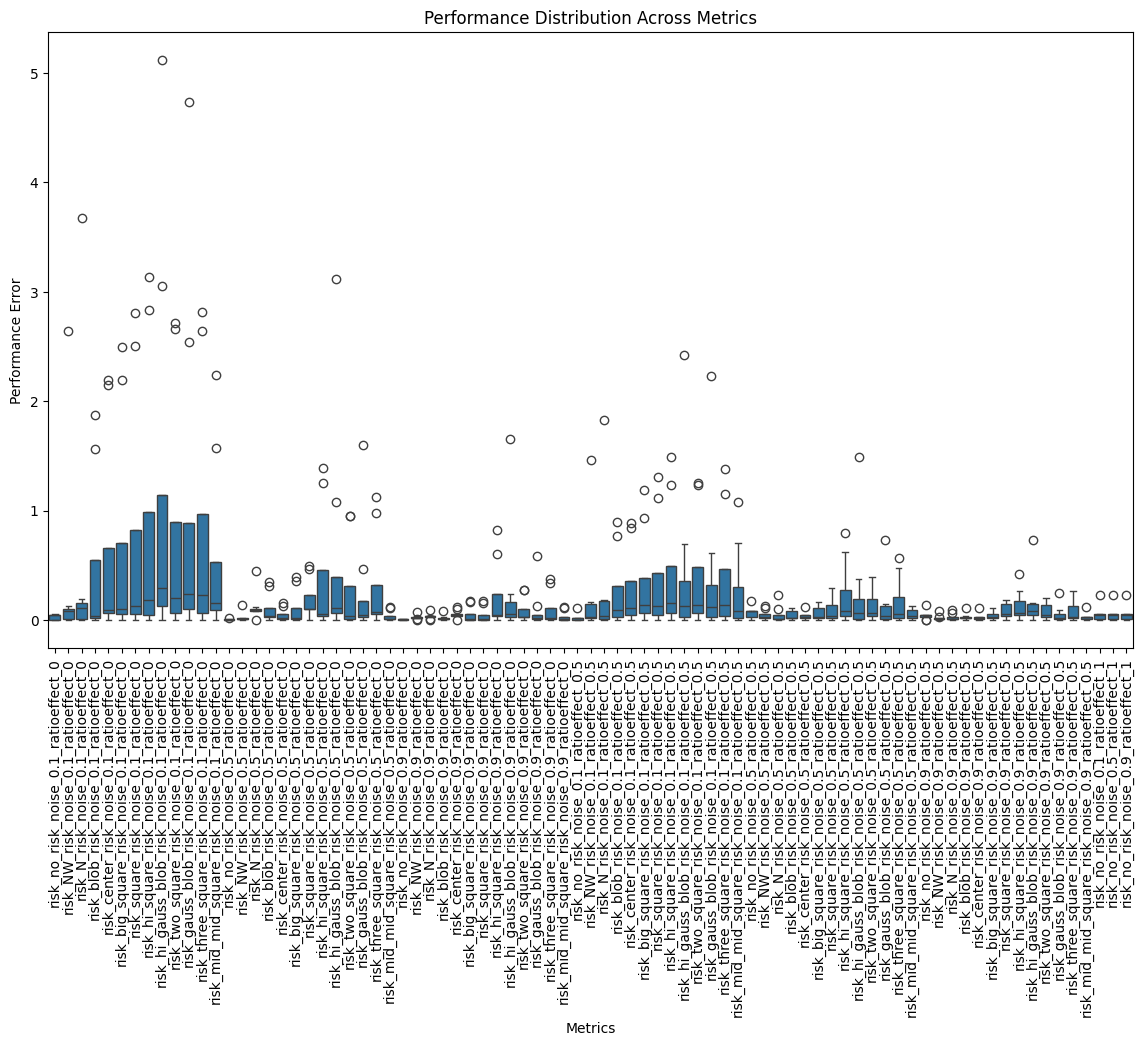

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Transpose the DataFrame for better plotting
df_melted = pd.melt(performances.iloc[:, :-1], var_name='metric', value_name='value')

plt.figure(figsize=(14, 8))
sns.boxplot(x='metric', y='value', data=df_melted)
plt.xticks(rotation=90)
plt.title('Performance Distribution Across Metrics')
plt.ylabel('Performance Error')
plt.xlabel('Metrics')
plt.show()

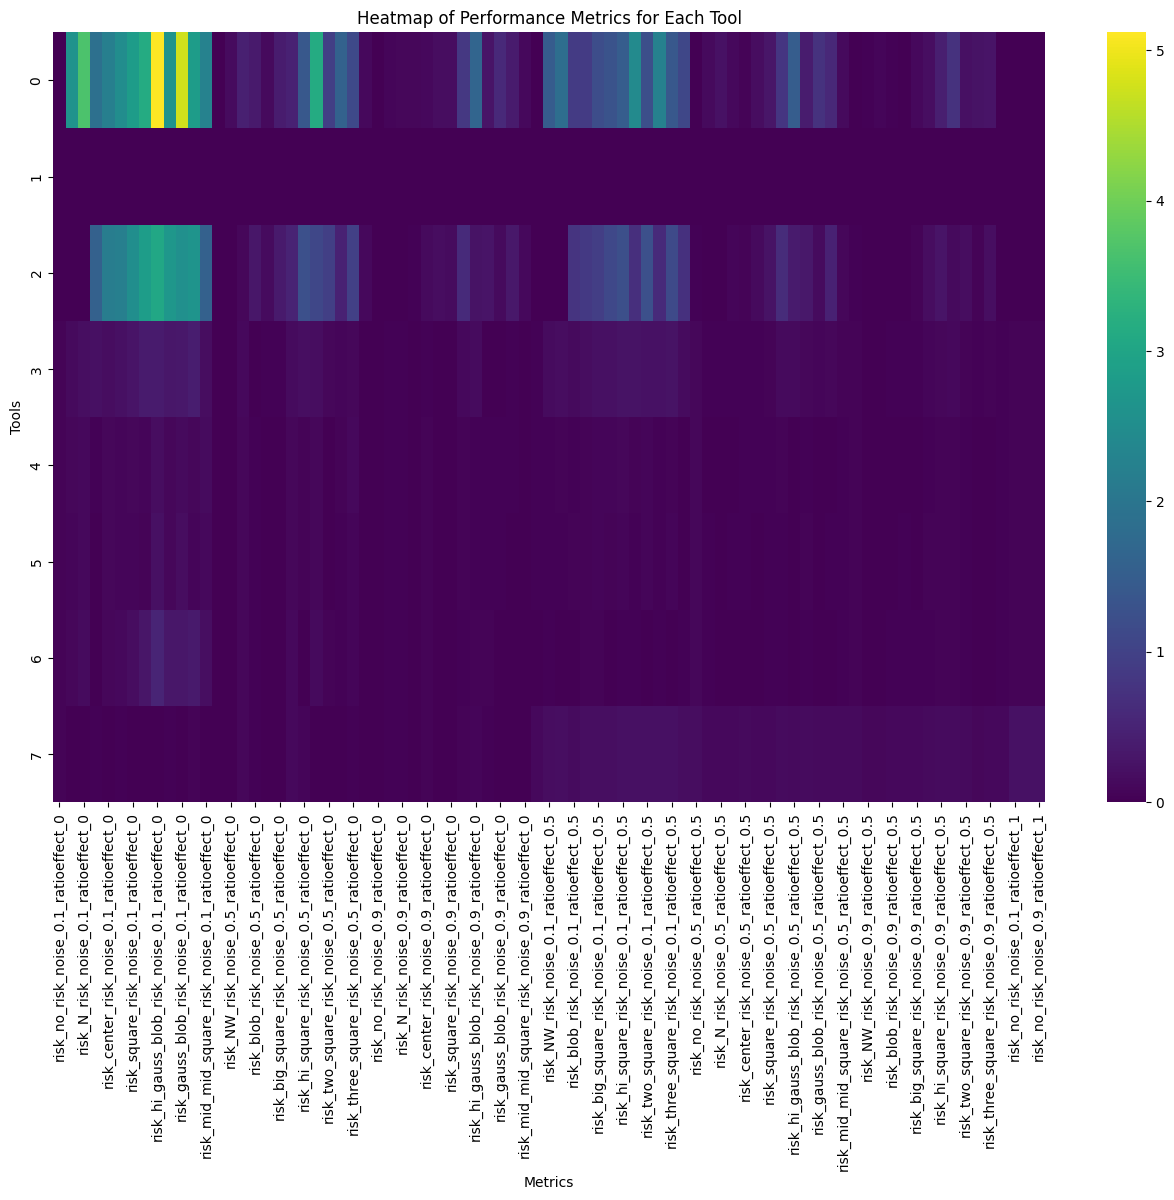

In [22]:
plt.figure(figsize=(16, 10))
sns.heatmap(performances.iloc[:, :-1], annot=False, cmap='viridis', cbar=True)
plt.title('Heatmap of Performance Metrics for Each Tool')
plt.ylabel('Tools')
plt.xlabel('Metrics')
plt.show()

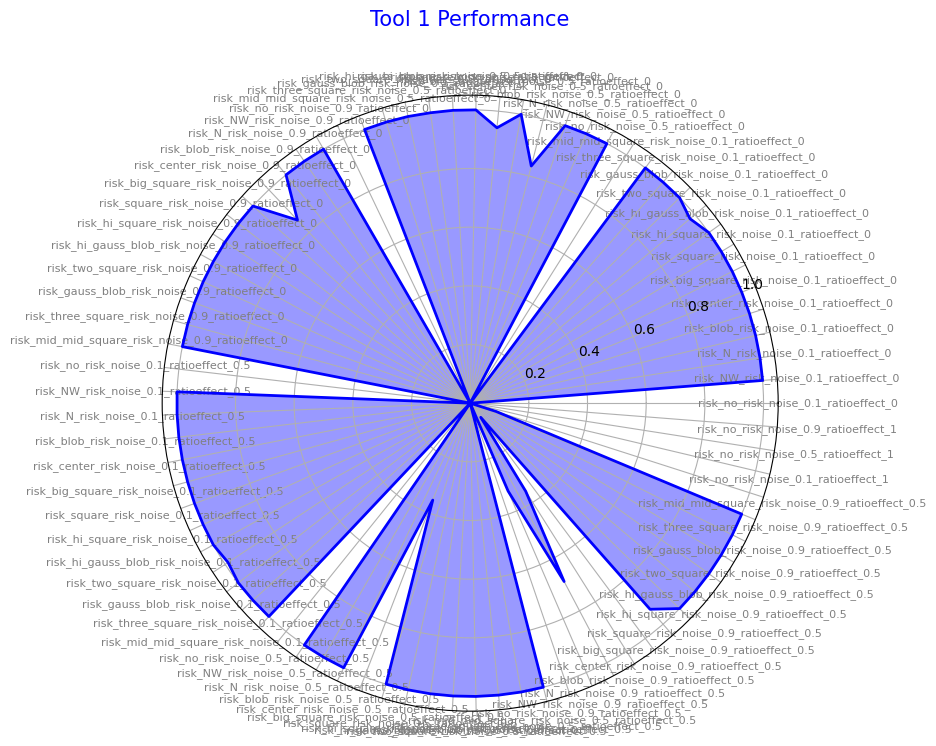

In [23]:
from math import pi

categories = list(performances.columns[:-1])
N = len(categories)

# Normalize the data for better visualization
normalized_df = pd.DataFrame(MinMaxScaler().fit_transform(performances.iloc[:, :-1]), columns=categories)

# Repeat the first value to close the radar chart
def create_radar_chart(row, title, color):
    values = normalized_df.iloc[row].tolist()
    values += values[:1]
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    ax.plot(angles, values, linewidth=2, linestyle='solid', color=color)
    ax.fill(angles, values, color, alpha=0.4)
    plt.title(title, size=15, color=color, y=1.1)

# Example for the first tool
create_radar_chart(0, 'Tool 1 Performance', 'blue')


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming your DataFrame is named performance_df

# Normalize the performance metrics (all columns except the last one)
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(performances.iloc[:, :-1]), columns=performances.columns[:-1])

# Calculate aggregate performance scores
performances['mean_performance'] = normalized_df.mean(axis=1)
performances['median_performance'] = normalized_df.median(axis=1)

# Rank the tools
performances['rank_by_mean'] = performances['mean_performance'].rank(method='min')
performances['rank_by_median'] = performances['median_performance'].rank(method='min')

# Identify the best tool based on mean or median performance
best_tool_mean = performances.iloc[performances['rank_by_mean'].idxmin()]['tools']
best_tool_median = performances.iloc[performances['rank_by_median'].idxmin()]['tools']

print(f'Best tool by mean performance: {best_tool_mean}')
print(f'Best tool by median performance: {best_tool_median}')
